In [54]:
library(dplyr) # Dataframe 
library(caret)
library(ggplot2)
library(gridExtra)
library(grid)
library(lattice)
library(VennDiagram)
#sapply(c("dplyr", "ggplot2", "splitstackshape", "treemap", "tidyr", "caret", "gridExtra", "grid", "lattice", "VennDiagram"), 
#       library, character.only = T, logical.return = T, quietly = T, warn.conflicts = F)

dplyr         ggplot2 splitstackshape         treemap           tidyr 
           TRUE            TRUE            TRUE            TRUE            TRUE 
          caret       gridExtra            grid         lattice     VennDiagram 
           TRUE            TRUE            TRUE            TRUE            TRUE

# Curation

In [2]:
games <- read.csv('data/bgg_db_2017_04.csv') %>%
    filter(! (min_players=='0' & max_players=='0' ) )
# Note that there are several entries as "games" that are actually catch-alls
# for some game categories, such as "Traditional Card Games". Additionally,
# there are several games that are poorly documented in some respects, 
# bringing the curation of the present values into question. To address both
# of these issues, I removed all games that had both a min_players and 
# max_players of 0, as this seems to have covered most of it. 

# However, also note that there are situations where min_players is a 
# realistic number, but max_players is 0. Manual investigation reveals that
# this typically indicates that the only supported number of players is the
# min_player value.
           
# Also note that games that have no player limit often have arbitrarily large
# values for max_players, like 99 or 999.

dim(games)
colnames(games)

[1] 4989   20

[1] "rank"        "bgg_url"     "game_id"     "names"       "min_players"
 [6] "max_players" "avg_time"    "min_time"    "max_time"    "year"       
[11] "avg_rating"  "geek_rating" "num_votes"   "image_url"   "age"        
[16] "mechanic"    "owned"       "category"    "designer"    "weight"

In [3]:
games %>%
    select(names, mechanic, category) %>%
    head(3)

names,mechanic,category
Pandemic Legacy: Season 1,"Action Point Allowance System, Co-operative Play, Hand Management, Point to Point Movement, Set Collection, Trading, Variable Player Powers","Environmental, Medical"
Through the Ages: A New Story of Civilization,"Action Point Allowance System, Auction/Bidding, Card Drafting, Hand Management","Card Game, Civilization, Economic"
Twilight Struggle,"Area Control / Area Influence, Campaign / Battle Card Driven, Dice Rolling, Hand Management, Simultaneous Action Selection","Modern Warfare, Political, Wargame"


In [4]:
games$mechanic <- as.character(games$mechanic)
games.mechexpand <- cSplit(games, splitCols = "mechanic", direction = "long")

mech.info <- games.mechexpand %>%
    group_by(mechanic) %>%
    mutate(count = length(mechanic), Average_Rating = mean(avg_rating)) %>%
    select(mechanic, count, Average_Rating) %>%
    unique()
#mech.info %>%
#    arrange((Average_Rating)) %>%
#    head()
#mech.info %>% group_by() %>% summarize(min = min(Average_Rating), max = max(Average_Rating))

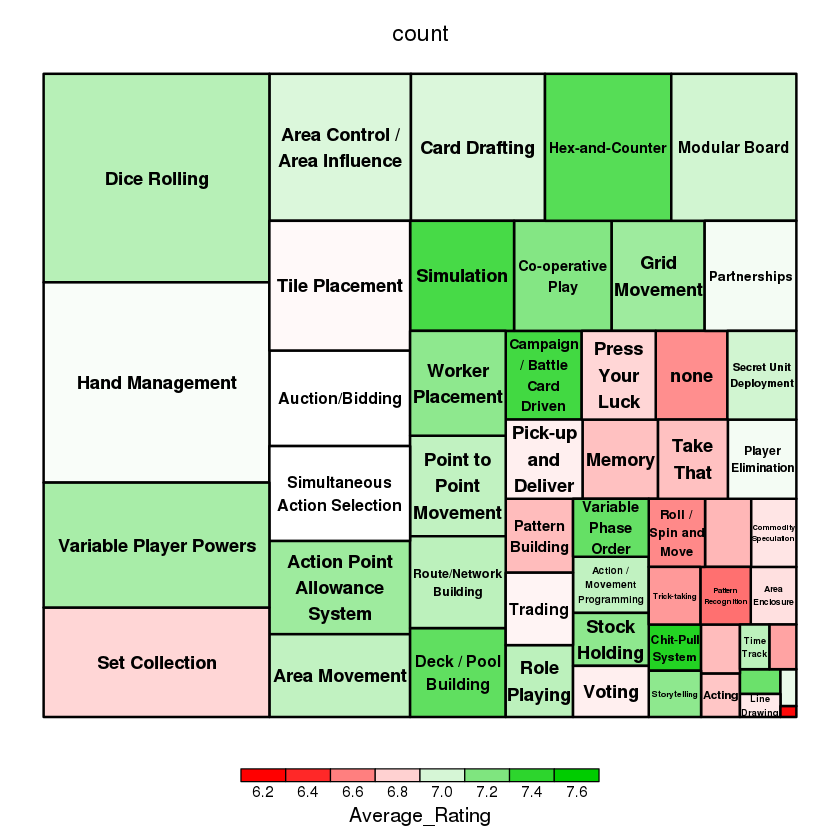

In [5]:
treemap(mech.info, index = "mechanic",vSize = "count", vColor = "Average_Rating", type='value', 
        palette = c('#ff0000','#ffffff','#00cc00'), range=c(6.2,7.6), mapping=c(6.3,7.5))

It's not terribly obvious which ones are the *highest* and *lowest* rated using this visualization, but it turns out that the 'Chit-Pull System' and 'Campaign / Battle Card Driven' mechanics have the highest two average ratings. I'm not too familiar with the 'Chit-Pull System' as a mechanic, but looking at the list of games that use it, I see that Castle Panic is one of them, which I have played (great game for fast-paced players who don't want to remember tons of rules!). I imagine it is referring to the mechanic where you randomly select a token that initiates an action.

The 'Singing' and 'Pattern Recognition' have the lowest average ratings. Funnily enough, 'None' was also one of the lowest scorers, so apparently games need to have mechanics to succeed!

Keep in mind that we're only considering the 5000 or so highest rated games, so don't get too offended that your favorite game mechanic has among the lowest average ratings here. This is just showing which mechanics can really make the difference between a *good* game and a *great* game!

In [6]:
games$category <- as.character(games$category)
games.catexpand <- cSplit(games, splitCols = "category", direction = "long")

cat.info <- games.catexpand %>%
    group_by(category) %>%
    mutate(count = length(category), Average_Rating = mean(avg_rating)) %>%
    select(category, count, Average_Rating) %>%
    unique()
#cat.info %>%
#    arrange(desc(Average_Rating)) %>%
#    head()
#cat.info %>% group_by() %>% summarize(min = min(Average_Rating), max = max(Average_Rating))

In [7]:
#treemap(cat.info, index = "category",vSize = "count", vColor = "Average_Rating", type='value', 
#        palette = c('#ff0000','#ffffff','#00cc00'), range=c(6.2,7.6), mapping=c(6.3,7.7))

# Specific Mechanics

I'm going to focus a bit more closely on these mechanics, which I find to be some of the most interesting, largely because most of them promote the creation of games that have extremely high replayability.

### Deck / Pool Building
Dominion, Super Motherlode, even "Deck Building - the Deck Building Game". I've never played a deck-building game I didn't like, except for the early iterations of my own feeble attempts at creating one. It is so satisfying to have everybody start with exactly the same starting deck and customize them using the same pool of options. Of course, not all deck-building games work like that, with exactly equivalent options (see Super Motherlode), but they are still very interesting. Pool-building is a bit different, but still enjoyable!

### Variable Player Powers
Sometimes this refers to occupational specialties (Pandemic, Forbidden Island, etc), sometimes supernatural powers (various Marvel and DC games), and sometimes it is a complex set of skills, traits, and equipment that you can use as you see fit (Arkham Horror, D&D-like games such as Descent: Journeys into the Dark, etc). In a well-designed game where different players have different abilities, everyone feels like their unique contribution is important. This mechanic increases replayability as well, since you can choose a different character or class, which immediately makes your approach to the game different!

### Modular Board
I grew up on Settlers of Catan (Seafarer's expansion), but nobody would ever play it as much as I did if it didn't have a variable board setup that made every game unique! Games like Settlers and StarCraft: The Board Game have flexible setups that are determined at the start, but other games build their play area as you go (Tikal, Betrayal at House on the Hill). Either way, modular boards are a great way to make every game different, and in some cases keep you guessing throughout the course of the game!

### Role Playing
The most obvious example to me is Dungeons and Dragons - a game (perhaps more accurately, a genre of game) that comes in all shapes and sizes, all levels of complexity and committment, ranging from pure storytelling and decisionmaking to tactical positioning and resource management. Other types of role playing include secret roles (Secret Hitler, Bang!) and hidden traitors (Shadows over Camelot) that introduce an element of uncertainty that keeps you on your toes. I think it is fun to role-play even when it isn't really part of the game - Small World gives you the chance to play the role of several different races throughout the game. In any case, I find that role playing is a way to have fun even when playing a not-particularly-fun game, and a way to have even more fun when the game is already enjoyable!

### Cooperative Play


I'll be addressing this moving forward, but keep in mind that many games have more than one of these select mechanic. In fact, Mage Knight Board Game has 4 of the 5! (Everything except for Cooperative) Apparently I should go get that game! (Friends and relatives - please let me actually look into the game before buying it for me under the assumption that I'm going to enjoy it just based on the inclusion of the mechanics that interest me)

In [39]:
select.mechs <- c('Deck / Pool Building', 'Variable Player Powers', 'Modular Board', 'Role Playing', 'Co-operative Play')
select.gamelist <- games.mechexpand %>% 
    filter(mechanic %in% select.mechs) %>% 
    select(names, mechanic, category) %>%
    group_by(names) %>%
    unique() %>%
    mutate(repetitive = length(names)) %>%
    select(names, repetitive) %>%
    unique() 

select.games <- merge(games, select.gamelist, by = 'names')

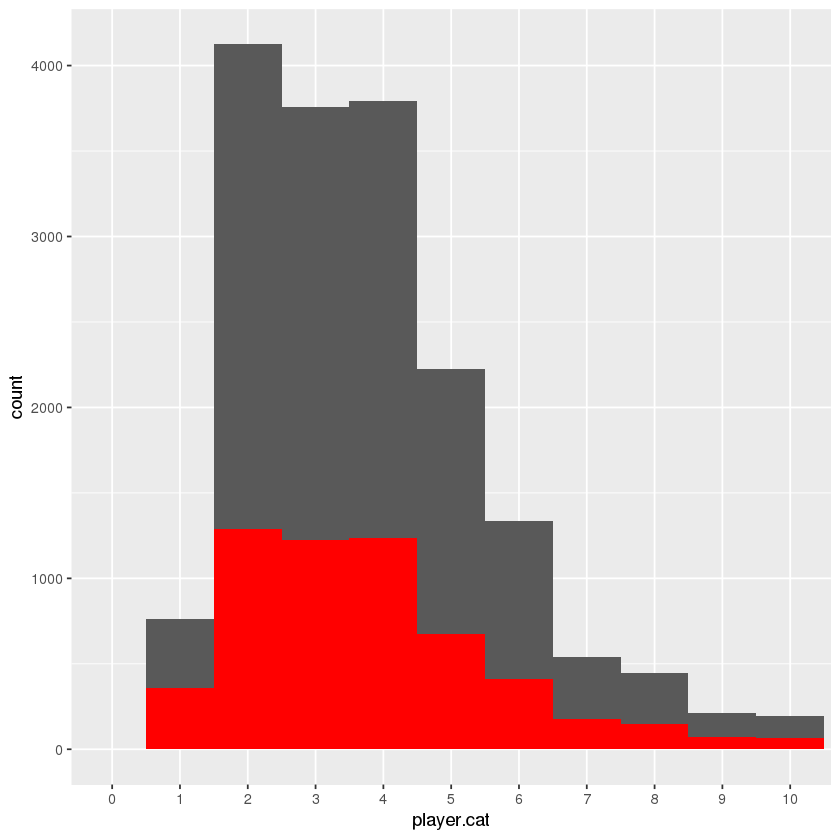

In [40]:
get_numlist <- function(minval, maxval) {
    if (minval == 0 && maxval == 0) return('')
    if (maxval == 0) return(minval)
    numlist <- c()
    for (i in minval:maxval) {
        numlist <- c(numlist, i)
    }
    paste(numlist, collapse=',')
}
expand_range <- function(min, max) {
    sapply(1:length(min), function(x) get_numlist(as.numeric(min[x]), as.numeric(max[x])))
}

games.plyrexpand <- games %>%
    mutate(players = expand_range(min_players, max_players)) %>%
    cSplit(splitCols = "players", direction = "long") %>%
    filter(players <= 10) %>%
    mutate(player.cat = factor(players))

select.games.plyrexpand <- select.games %>%
    mutate(players = expand_range(min_players, max_players)) %>%
    cSplit(splitCols = "players", direction = "long") %>%
    filter(players <= 10) %>%
    mutate(player.cat = factor(players))
           
select.games.plyrexpand %>% 
    ggplot(aes(x=player.cat)) +
           geom_bar(data=games.plyrexpand, width=1) +
           geom_bar(fill='red', width=1)

In [41]:
games.mechexpand %>% 
    filter(mechanic %in% select.mechs) %>% 
    select(names, mechanic, category) %>%
    group_by(names) %>%
    unique() %>%
    mutate(repetitive = length(names)) %>%
    arrange(desc(repetitive)) %>%
    head(20)
#%>%
#    ungroup() %>%
#    select(names, repetitive) %>%
#    unique() %>%
#    select(repetitive) %>%
#    table()

names,mechanic,category,repetitive
Mage Knight Board Game,Co-operative Play,"Adventure, Exploration, Fantasy, Fighting",5
Mage Knight Board Game,Deck / Pool Building,"Adventure, Exploration, Fantasy, Fighting",5
Mage Knight Board Game,Modular Board,"Adventure, Exploration, Fantasy, Fighting",5
Mage Knight Board Game,Role Playing,"Adventure, Exploration, Fantasy, Fighting",5
Mage Knight Board Game,Variable Player Powers,"Adventure, Exploration, Fantasy, Fighting",5
Mansions of Madness: Second Edition,Co-operative Play,"Adventure, Exploration, Fantasy, Fighting, Horror, Miniatures, Murder/Mystery, Puzzle",4
Mansions of Madness: Second Edition,Modular Board,"Adventure, Exploration, Fantasy, Fighting, Horror, Miniatures, Murder/Mystery, Puzzle",4
Mansions of Madness: Second Edition,Role Playing,"Adventure, Exploration, Fantasy, Fighting, Horror, Miniatures, Murder/Mystery, Puzzle",4
Mansions of Madness: Second Edition,Variable Player Powers,"Adventure, Exploration, Fantasy, Fighting, Horror, Miniatures, Murder/Mystery, Puzzle",4
Arkham Horror: The Card Game,Co-operative Play,"Adventure, Card Game, Collectible Components, Fantasy, Horror, Novel-based",4


Which mechanics synergize well with which categories? Do a linear model with both of these variables and their interaction terms, and then visualize the strength of the interaction terms.

In [42]:
mechlist <- as.character(mech.info %>% arrange(mechanic) %>% .$mechanic)
catlist <- as.character(cat.info %>% arrange(category) %>% .$category)

inclusion.features <- function(rating, mechanics, categories) {
    mechs <- strsplit(mechanics, ', ')[[1]]
    cats <- strsplit(categories, ', ')[[1]]
    return( c(as.numeric(rating), mechlist %in% mechs, catlist %in% cats) )
}

In [43]:
model.data <- games %>% select(avg_rating, mechanic, category) 
model.features <- as.data.frame(t(unname(apply(model.data, 1, function(x) inclusion.features(x[1], x[2], x[3])))))
cs <- catlist
cs[cs == 'none'] <- 'No category'
cs[cs == 'Memory'] <- 'Memory Category'
colnames(model.features) <- c('rating', mechlist, cs)
head(model.features)

rating,Acting,Action / Movement Programming,Action Point Allowance System,Area Control / Area Influence,Area Enclosure,Area Movement,Area-Impulse,Auction/Bidding,Betting/Wagering,⋯,Transportation,Travel,Trivia,Video Game Theme,Vietnam War,Wargame,Word Game,World War I,World War II,Zombies
8.66905,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8.72977,0,0,1,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
8.35745,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
8.29627,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9.08970,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8.53049,0,0,0,1,0,1,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0


In [112]:
# Here I use the covariance calculation to calculate the attribute pairs that occur together fairly often.
# In fact, the top 5 recurring combinations involving my selected mechanics.
interacting <- melt(cov(model.features[,-1])*1000) %>% 
    filter(Var1 %in% select.mechs, Var2 %in% catlist) %>%
    rename(Mech=Var1, Cat=Var2) %>%
    mutate(Mech=as.character(Mech), Cat=as.character(Cat), value = round(value, 2)) %>%
    group_by(Mech) %>%
    top_n(n=5, wt=value) %>%
    arrange(Mech, -value)
interacting
att.list <- unique(do.call("c", interacting[,1:2]))

Mech,Cat,value
Co-operative Play,Adventure,13.07
Co-operative Play,Fantasy,11.14
Co-operative Play,Horror,9.27
Co-operative Play,Exploration,7.39
Co-operative Play,Fighting,6.87
Deck / Pool Building,Card Game,18.44
Deck / Pool Building,Fantasy,12.51
Deck / Pool Building,Fighting,5.19
Deck / Pool Building,Comic Book / Strip,3.63
Deck / Pool Building,Video Game Theme,3.34


(polygon[GRID.polygon.536], polygon[GRID.polygon.537], polygon[GRID.polygon.538], polygon[GRID.polygon.539], text[GRID.text.540], text[GRID.text.541], text[GRID.text.542], text[GRID.text.543], text[GRID.text.544]) 

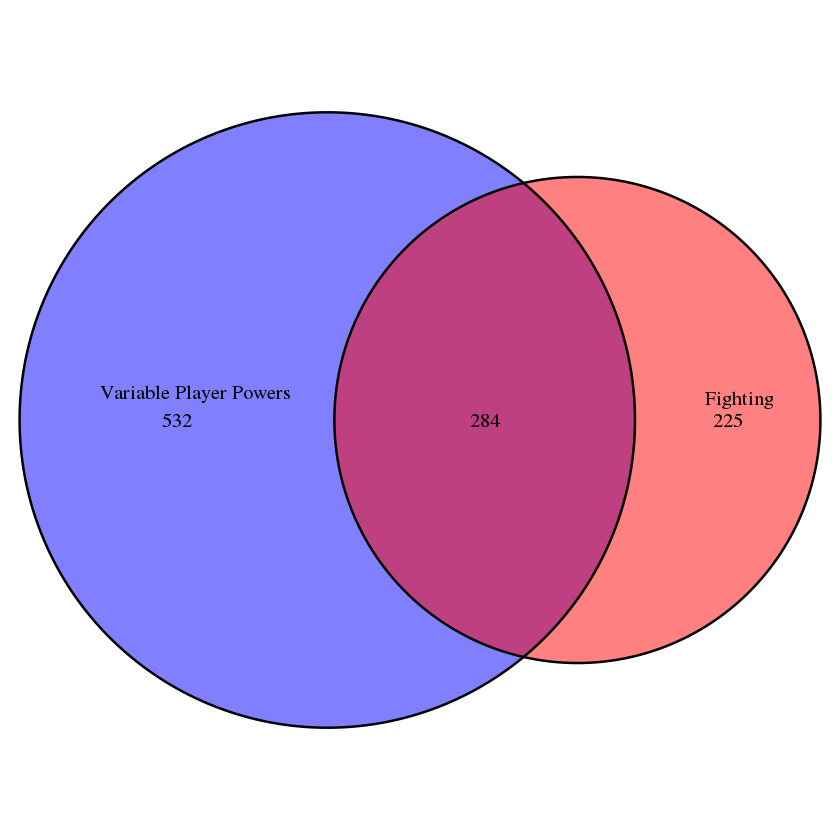

In [86]:
venn.values <- function(data, x, y) {
    nx <- sum(data[,x])
    ny <- sum(data[,y])
    both <- sum(rowSums(data[,c(x,y)]) == 2)
    draw.pairwise.venn(nx, ny, both, 
                   category=c(x,y), 
                   fill=c("blue", "red"),
                   cat.default.pos='text',
                   cat.just=c(list(c(0.25,0.25)),list(c(0.75,0.75))))
} 
venn.values(model.features, 'Variable Player Powers', 'Fighting')

(polygon[GRID.polygon.527], polygon[GRID.polygon.528], polygon[GRID.polygon.529], polygon[GRID.polygon.530], text[GRID.text.531], text[GRID.text.532], text[GRID.text.533], text[GRID.text.534], text[GRID.text.535]) 

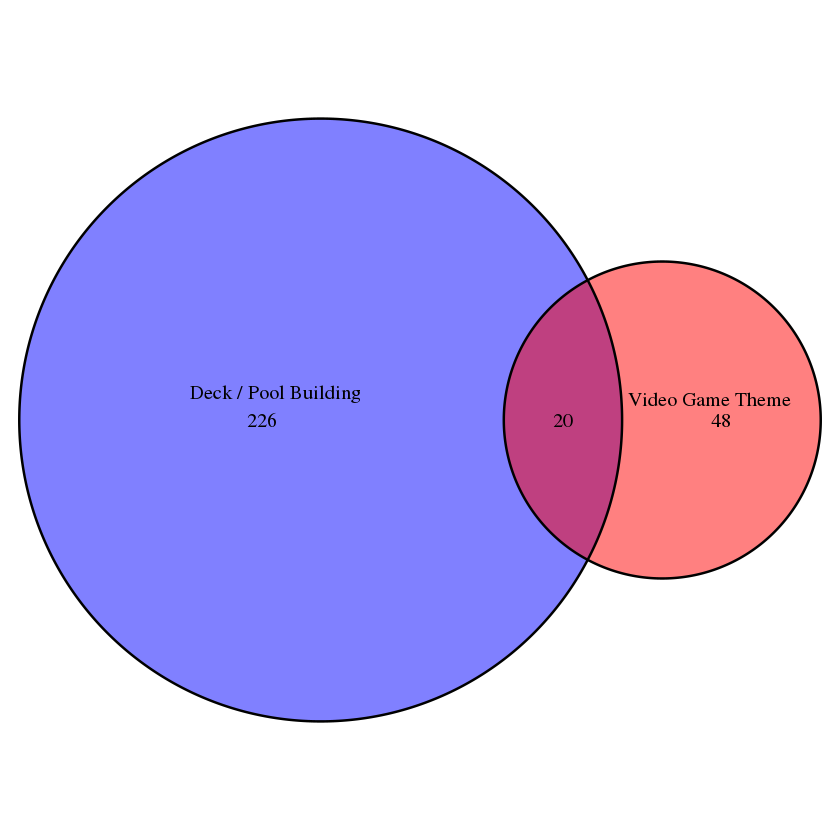

In [84]:
venn.values(model.features, 'Deck / Pool Building', 'Video Game Theme')

In [81]:
int.mat <- matrix(, nrow = length(mechlist), ncol = length(catlist))
colnames(int.mat) <- cs
rownames(int.mat) <- mechlist

ever.happens <- function(m, c, min=1) {
    return(sum(rowSums(model.features[,c(m,c)]) == 2) >= min)
}

i <- 138 # 138 is Role Playing, Adventure
pairs <- expand.grid(mech=mechlist, cat=cs, stringsAsFactors=F)
pairs$happens <- apply(pairs, 1, function(x) ever.happens(x[1], x[2], 10))
sum(pairs$happens)

[1] 952

In [27]:
#glm(formula = qual_status ~ gear * depth * length * condition * 
#    in_water * in_air * delta_temp, family = binomial, data = logit)
a <- 'Role Playing'
model <- lm(rating ~ . + `Role Playing`*Adventure, data=model.features)  # build linear regression model on full data
print(model)


Call:
lm(formula = rating ~ . + `Role Playing` * Adventure, data = model.features)

Coefficients:
                    (Intercept)                           Acting  
                      6.6519327                        0.1631094  
`Action / Movement Programming`  `Action Point Allowance System`  
                      0.0300717                        0.0736531  
`Area Control / Area Influence`                 `Area Enclosure`  
                      0.0661047                       -0.0455269  
                `Area Movement`                   `Area-Impulse`  
                      0.0221312                        0.1307142  
              `Auction/Bidding`               `Betting/Wagering`  
                      0.0003834                        0.0776849  
`Campaign / Battle Card Driven`                  `Card Drafting`  
                      0.2482862                        0.0963883  
             `Chit-Pull System`              `Co-operative Play`  
                      0.172042